# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [ ]:
# Dataset url
url = Ruta + "datasets/clustering/clustering.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print the dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [ ]:
# get the number of observations and variables
df.shape


(1024, 6)

2. Drop rows with any missing values


In [ ]:
# Drop rows with NaN values if existing
#df.dropona
df.isnull().sum()
# Print the new shape


x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

3. Scatterplot




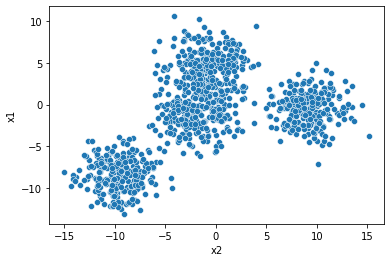

In [ ]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, y="x1", x="x2")
plt.show()


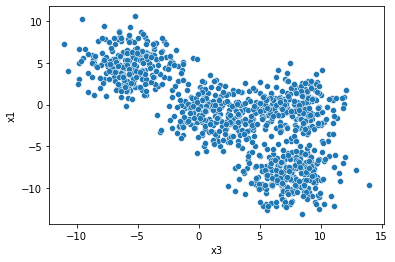

In [ ]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, y="x1", x="x3")
plt.show()


Difficult to plot independetly all combinations, let's use pairplot

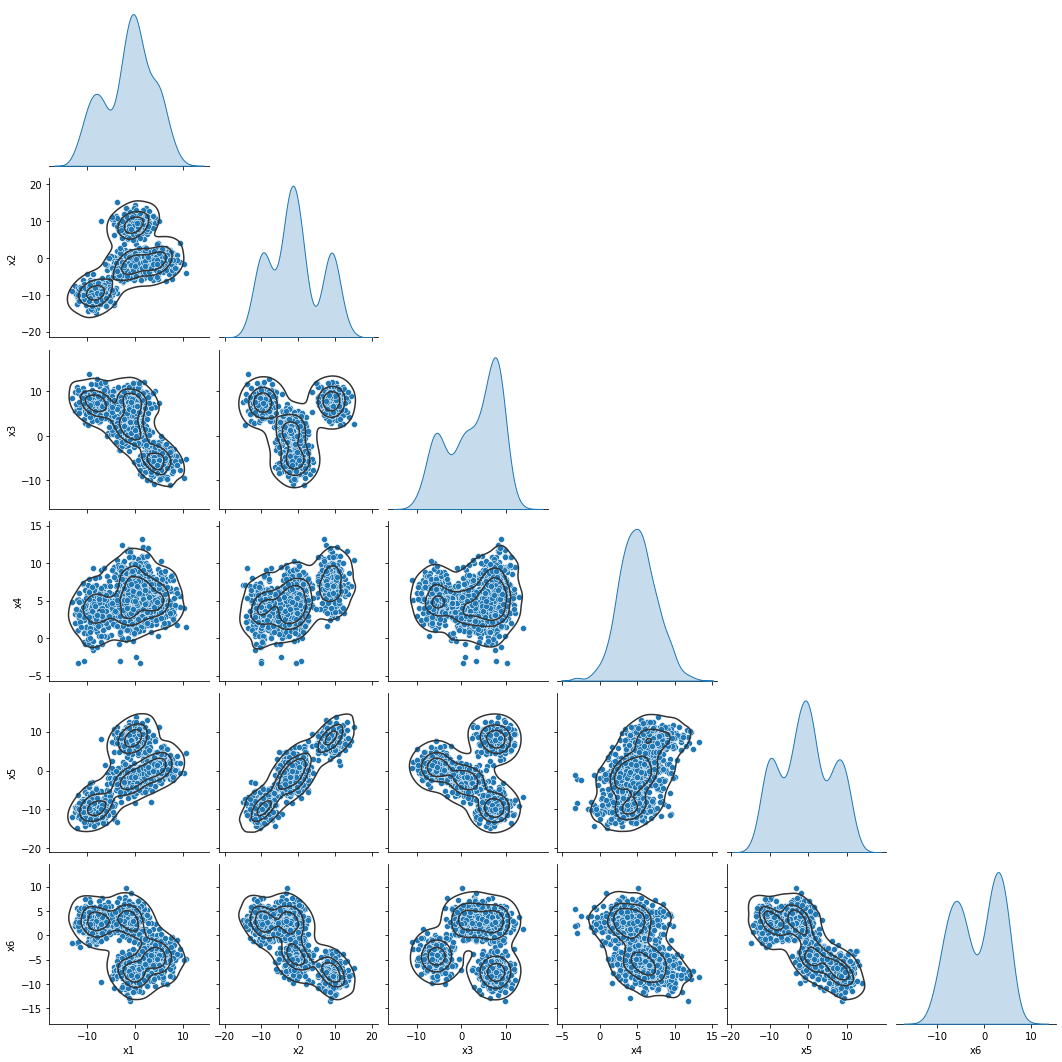

In [ ]:
# Pairplot: Scatterplot of all variables
g=sns.pairplot(df, corner= True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [ ]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
# Let's assume there are 2,3,4,5...? clusters/groups
K  = 3    

#Create/Initialize the KMeans box/object
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
#Ajustando y prediciento
#Nos da un array de 1024 datos
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated



array([0, 2, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
# Add a new column to the dataset with the cluster information
#Imprime el df con la columna de a que grupo pertenece cada dato (tenemos 3 clusters)
df['yestimated'] = yestimated
df

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,0
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,2
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,2
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,2
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,0
...,...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649,0
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336,1
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100,2
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975,0


In [ ]:
# Print the labels or names of the clusters
df.yestimated.unique()


array([0, 2, 1], dtype=int32)

In [ ]:
# Cluster centroides
km.cluster_centers_


array([[ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018,  2.        ],
       [-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451,  1.        ],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  0.        ]])

In [ ]:
# Sum of squared error (sse) of the final model
km.inertia_


44295.1263266536

In [ ]:
# The number of iterations required to converge
km.n_iter_

6

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [ ]:
km.cluster_centers_

array([[ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018,  2.        ],
       [-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451,  1.        ],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  0.        ]])

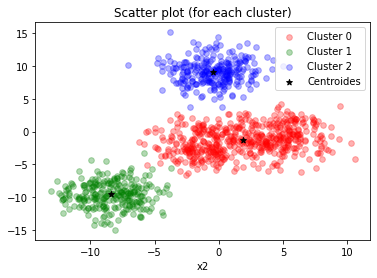

In [ ]:
# Get a dataframe with the data of each cluster
df1=df[df.yestimated==0]
df2=df[df.yestimated==1]
df3=df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
#Plot centroides
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='Centroides')

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
# Intialize a list to hold sum of squared error (sse)
sse=[]

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  #Create model
  km=KMeans(n_clusters=k, n_init="auto")
  #Do K-means clustering 
  km.fit_predict(df[['x1','x2']])
  #Save sse for each k
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

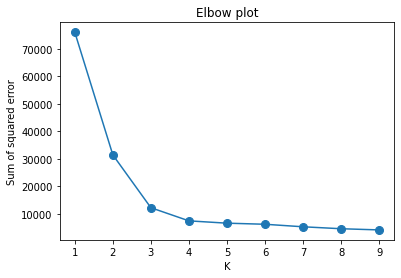

In [ ]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')

Choose the k after which the sse is minimally reduced
